# Modeling of Physical Systems

**Created by**: Marcin Zub

**Date**: 15.03.2025

**Title**: *Laboratory_02*

## Package installation
First, we need to install some additional packages wchich are not a part of Google Colab.

We will use `pip` for that. Packages we need:

- `pint` - handles unit conversion
- `open-atmos-jupyter-utils` - helps to print vector images from matplotlib  

In [1]:
!pip install pint open-atmos-jupyter-utils

Next, we will import the packages that are pre-installed on Google Colab, and those which were installed by us in previous step:

- `math` - handles math operations like `math.sqrt` & `math.exp`
- `numpy` - array manipulation tool
- `scipy` - provides constants like `pi`
- `matplotlib` - handles data visualization

In [2]:
import pint
import math
import numpy as np
import open_atmos_jupyter_utils

from scipy import constants
from matplotlib import pyplot

## Setup

In this step we will setup a `pint.UnitRegistry`, which provides us with unit definitions, their relations and handles conversion.

Also, we hook it with `matplotlib` module for automatic axis labeling.

In [3]:
ureg = pint.UnitRegistry()
ureg.setup_matplotlib()

## Calculations

The formula we're about to write is Gaussian solution for advection-diffusion problems.

It is being presented below:

<br>

$c(x,t) = \frac{M}{A}\frac{1}{2\sqrt{\pi D}}\frac{x}{t^{3/2}}\exp\bigl[-\frac{(ut-x)^2}{4Dt}\bigr]$

<br>

Here is the overview of the parameters:

- $M\text{ }[kg]$: total mass released
- $A\text{ }[m^3]$: cross-section area   
- $D\text{ }[\frac{m^2}{s}]$: diffusion coefficient
- $u\text{ }[\frac{m}{s}]$: advection velocity
- $x\text{ }[m]$: position
- $t\text{ }[s]$: time


Our goal would be to write some function `c(x,t)` which will calculate the concentration in time.

To best ilustrate the process, we will:
1. Divide the formula into smaller chunks of calculations
2. Process them one by one
3. Put them together at the end

**Let's get to work!**

First, let us define some variables we'll need for calculations:

In [11]:
M = 1000 * ureg.kg
A = 10 * ureg.m**2
D = 10 * ureg.m**2 / ureg.s
u = 10 * ureg.m / ureg.s

Now, onto the function definition:

In [12]:
def calc_concentration(x, t) -> pint.Quantity:
    """
    Computes:
      c(x,t): concentration in time.

    Parameters:
      x : float
         Position in meters.
      t : float
         Time in seconds.

    Returns:
      c : pint.Quantity
         Concentration with units kg/m^3.
    """

    factor_1 = M / A
    factor_2 = 1.0 / (2.0 * np.sqrt(constants.pi * D * t))
    factor_3 = x / (np.pow(t, 1.5))

    exponent = -(np.pow((u * t) - x, 2)) / (4.0 * D * t)
    factor_4 = np.exp(exponent)

    result = factor_1 * factor_2 * factor_3 * factor_4
    result = result.to_base_units()

    return result

Then, we can create an array with `time` values in `[s]` which will be passed into the function, as well as define the `x` variable with something random for a start.

In [24]:
x = 10 * ureg.m
t_arr = np.linspace(0, 100, 2000) * ureg.s

Next step is to plot the data:

/usr/local/lib/python3.11/dist-packages/pint/facets/plain/quantity.py:1062: RuntimeWarning: divide by zero encountered in divide
  return self.__class__(other_magnitude / self._magnitude, 1 / self._units)
/usr/local/lib/python3.11/dist-packages/pint/facets/plain/quantity.py:1033: RuntimeWarning: divide by zero encountered in divide
  return operator.truediv(a, b)
/usr/local/lib/python3.11/dist-packages/pint/facets/plain/quantity.py:1006: RuntimeWarning: divide by zero encountered in divide
  magnitude = magnitude_op(new_self._magnitude, other._magnitude)
/usr/local/lib/python3.11/dist-packages/pint/facets/plain/quantity.py:1006: RuntimeWarning: invalid value encountered in multiply
  magnitude = magnitude_op(new_self._magnitude, other._magnitude)


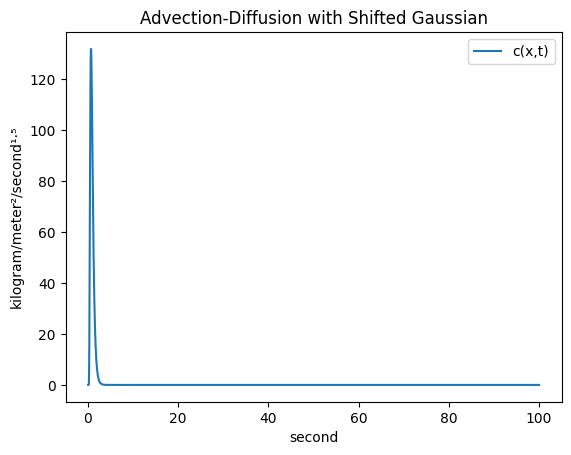

In [25]:
# Plot
pyplot.plot(t_arr, calc_concentration(x, t_arr), label="c(x,t)")
pyplot.title('Advection-Diffusion with Shifted Gaussian')
pyplot.legend()
pyplot.show()

**Something is seriously wrong with this plot - let us try to use some better values.**

Now, looking at the formula, we can observe the following:

1. $M$ and $A$ have an influence on overal amplitude of the plot
2. $D$ will be responsible for the broadness of the curve
3. $u$ and $x$ shift the exponential

Based on these observations, after trial-and-error process, we can come up with the following representation of the variables:

In [8]:
# Final values
M = 69.7 * ureg.kg
A = 10 * ureg.m**2
D = 0.1 * ureg.m**2 / ureg.s
u = 0.35 * ureg.m / ureg.s
x = 20 * ureg.m

The final plot looks like so:

/usr/local/lib/python3.11/dist-packages/pint/facets/plain/quantity.py:1033: RuntimeWarning: divide by zero encountered in divide
  return operator.truediv(a, b)


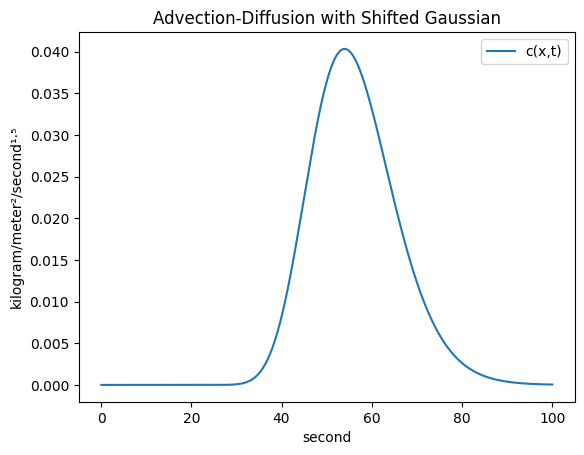

In [9]:
# Plot
pyplot.plot(t_arr, calc_concentration(x, t_arr), label="c(x,t)")
pyplot.title('Advection-Diffusion with Shifted Gaussian')
pyplot.legend()
pyplot.show()

## *The end.*

In [10]:
print("Done")

Done
